<a href="https://colab.research.google.com/github/Farheen96/Jupyter-notebooks/blob/main/Task_3_feature_engineering_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Feature Engineering

---

1. Import packages
2. Load data
3. Feature engineering

---

## 1. Import packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

---
## 2. Load data

In [2]:
df = pd.read_csv('./clean_data_after_eda.csv')
df["date_activ"] = pd.to_datetime(df["date_activ"], format='%Y-%m-%d')
df["date_end"] = pd.to_datetime(df["date_end"], format='%Y-%m-%d')
df["date_modif_prod"] = pd.to_datetime(df["date_modif_prod"], format='%Y-%m-%d')
df["date_renewal"] = pd.to_datetime(df["date_renewal"], format='%Y-%m-%d')

In [3]:
df.head(3)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,var_6m_price_off_peak_var,var_6m_price_peak_var,var_6m_price_mid_peak_var,var_6m_price_off_peak_fix,var_6m_price_peak_fix,var_6m_price_mid_peak_fix,var_6m_price_off_peak,var_6m_price_peak,var_6m_price_mid_peak,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,0.000131,4.100838e-05,0.000908,2.086294,99.530517,44.235794,2.086425,9.953056e+01,44.236702,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.000003,1.217891e-03,0.000000,0.009482,0.000000,0.000000,0.009485,1.217891e-03,0.000000,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0.000004,9.450150e-08,0.000000,0.000000,0.000000,0.000000,0.000004,9.450150e-08,0.000000,0


In [4]:
client_data = pd.read_csv('client_data.csv')
price_data = pd.read_csv('price_data.csv')

In [5]:
print(df.isna().sum())
print(price_data.isna().sum())
print(client_data.isna().sum())


id                                0
channel_sales                     0
cons_12m                          0
cons_gas_12m                      0
cons_last_month                   0
date_activ                        0
date_end                          0
date_modif_prod                   0
date_renewal                      0
forecast_cons_12m                 0
forecast_cons_year                0
forecast_discount_energy          0
forecast_meter_rent_12m           0
forecast_price_energy_off_peak    0
forecast_price_energy_peak        0
forecast_price_pow_off_peak       0
has_gas                           0
imp_cons                          0
margin_gross_pow_ele              0
margin_net_pow_ele                0
nb_prod_act                       0
net_margin                        0
num_years_antig                   0
origin_up                         0
pow_max                           0
var_year_price_off_peak_var       0
var_year_price_peak_var           0
var_year_price_mid_peak_var 

In [6]:
# Check unique values in some columns
print(df.nunique())
print(price_data.nunique())
print(client_data.nunique())

id                                14606
channel_sales                         8
cons_12m                          11065
cons_gas_12m                       2112
cons_last_month                    4751
date_activ                         1796
date_end                            368
date_modif_prod                    2129
date_renewal                        386
forecast_cons_12m                 13993
forecast_cons_year                 4218
forecast_discount_energy             12
forecast_meter_rent_12m            3528
forecast_price_energy_off_peak      516
forecast_price_energy_peak          329
forecast_price_pow_off_peak          41
has_gas                               2
imp_cons                           7752
margin_gross_pow_ele               2391
margin_net_pow_ele                 2391
nb_prod_act                          10
net_margin                        11965
num_years_antig                      13
origin_up                             6
pow_max                             698


In [7]:
# Example: Remove columns with only one unique value
df = df.loc[:, df.nunique() > 1]
price_data = price_data.loc[:, price_data.nunique() > 1]
client_data = client_data.loc[:, client_data.nunique() > 1]

In [8]:
df.shape

(14606, 44)

In [9]:
price_data.shape

(193002, 8)

In [10]:
client_data.shape

(14606, 26)

---

## 3. Feature engineering

### Difference between off-peak prices in December and preceding January

Below is the code created by your colleague to calculate the feature described above. Use this code to re-create this feature and then think about ways to build on this feature to create features with a higher predictive power.

## Create New Features from Dates

In [11]:
# expand the datasets and use existing columns to create new features?
# For example, if you have “date” columns, in their raw form they are not so useful. But if you were to extract month, day of month, day of year and year into individual columns, these could be more useful.

# Extract month, day of month, day of year and year from 'date_activ'
df['date_activ_month'] = df['date_activ'].dt.month
df['date_activ_day'] = df['date_activ'].dt.day
df['date_activ_dayofyear'] = df['date_activ'].dt.dayofyear
df['date_activ_year'] = df['date_activ'].dt.year

# Extract month, day of month, day of year and year from 'date_end'
df['date_end_month'] = df['date_end'].dt.month
df['date_end_day'] = df['date_end'].dt.day
df['date_end_dayofyear'] = df['date_end'].dt.dayofyear
df['date_end_year'] = df['date_end'].dt.year

# Extract month, day of month, day of year and year from 'date_modif_prod'
df['date_modif_prod_month'] = df['date_modif_prod'].dt.month
df['date_modif_prod_day'] = df['date_modif_prod'].dt.day
df['date_modif_prod_dayofyear'] = df['date_modif_prod'].dt.dayofyear
df['date_modif_prod_year'] = df['date_modif_prod'].dt.year

# Extract month, day of month, day of year and year from 'date_renewal'
df['date_renewal_month'] = df['date_renewal'].dt.month
df['date_renewal_day'] = df['date_renewal'].dt.day
df['date_renewal_dayofyear'] = df['date_renewal'].dt.dayofyear
df['date_renewal_year'] = df['date_renewal'].dt.year

# Calculate the difference between dates
df['activ_end_diff'] = (df['date_end'] - df['date_activ']).dt.days
df['modif_renewal_diff'] = (df['date_renewal'] - df['date_modif_prod']).dt.days


In [12]:
df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,date_modif_prod_month,date_modif_prod_day,date_modif_prod_dayofyear,date_modif_prod_year,date_renewal_month,date_renewal_day,date_renewal_dayofyear,date_renewal_year,activ_end_diff,modif_renewal_diff
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,11,1,305,2015,6,23,174,2015,1096,-131
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,8,21,233,2009,8,31,243,2015,2566,2201
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,4,16,106,2010,4,17,107,2015,2192,1827
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,3,30,89,2010,3,31,90,2015,2192,1827
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,1,13,13,2010,3,9,68,2015,2245,1881


In [13]:
# check how many rows of "channel_sales" have value "MISSING"

df[df['channel_sales'] == "MISSING"].shape[0]


3725

In [14]:
df.shape

(14606, 62)

## Combine Columns to Create New Features

In [15]:
# can we combine some columns together to create “better” columns?
#We’re trying to accurately predict churn - so a “better” column could be a column that improves the accuracy of the model
#And which columns to combine? This can sometimes be a matter of experimenting until you find something useful,
#or you may notice that 2 columns share very similar information so you want to combine them.

# For example, we can combine the 'cons_12m' and 'cons_gas_12m' columns
# to create a new column called 'total_consumption_12m'.

df['total_consumption_12m'] = df['cons_12m'] + df['cons_gas_12m']

# Similarly, we can combine the 'forecast_cons_12m' and 'forecast_cons_year'
# columns to create a new column called 'total_forecast_consumption'.

df['total_forecast_consumption'] = df['forecast_cons_12m'] + df['forecast_cons_year']

# We can also create a new column called 'has_gas' which indicates whether a customer
# uses gas or not.

df['has_gas'] = df['has_gas'].map({'t': 1, 'f': 0})

# Create a new feature: Forecast accuracy
df['forecast_accuracy'] = df['forecast_cons_12m'] - df['cons_12m']

# Create another feature: Margin per year of antiquity
df['margin_per_year'] = df['net_margin'] / df['num_years_antig']



In [16]:
df.shape

(14606, 66)

In [17]:
df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,date_renewal_month,date_renewal_day,date_renewal_dayofyear,date_renewal_year,activ_end_diff,modif_renewal_diff,total_consumption_12m,total_forecast_consumption,forecast_accuracy,margin_per_year
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,6,23,174,2015,1096,-131,54946,0.00,0.00,226.330000
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,8,31,243,2015,2566,2201,4660,189.95,-4470.05,3.148333
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,4,17,107,2015,2192,1827,544,47.96,-496.04,1.100000
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,3,31,90,2015,2192,1827,1584,240.04,-1343.96,4.243333
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,3,9,68,2015,2245,1881,4425,971.75,-3979.25,7.996667


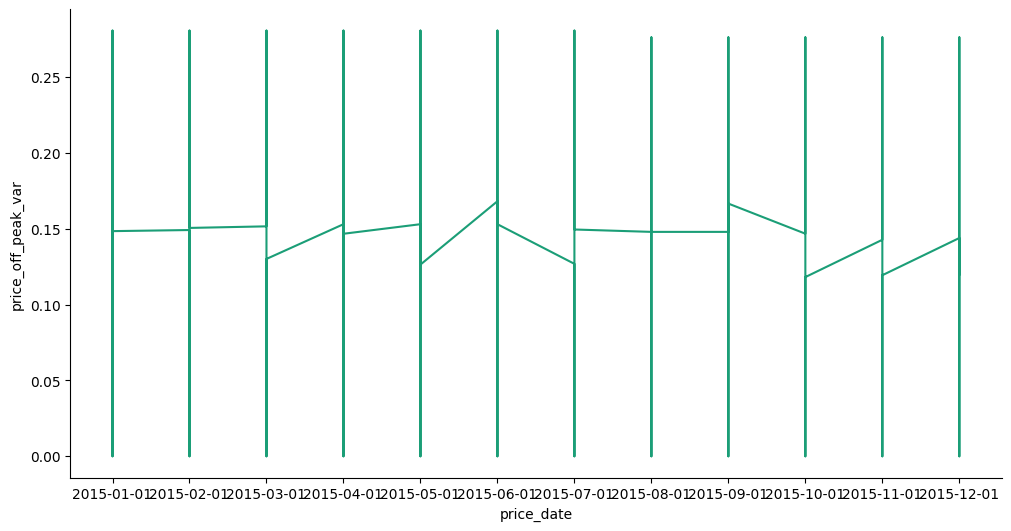

In [18]:
# title price_date vs price_off_peak_var

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['price_date']
  ys = series['price_off_peak_var']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = price_data.sort_values('price_date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('price_date')
_ = plt.ylabel('price_off_peak_var')

Here's what can be inferred:

**Cyclic Pattern:** The vertical lines indicate a recurring pattern throughout the year, suggesting a cycle in off-peak price variation.

**Monthly Fluctuations**: The price variation shows peaks and troughs each month, indicating regular fluctuations within each month.

**Seasonal Variation**: The overall trend appears to slightly decrease over the year, which could indicate a seasonal effect on the off-peak prices.

**Volatility**: The long vertical lines indicate that the data has a significant range or volatility each month, with some months showing more variation than others.

## Calculate Off-Peak Price Differences

In [20]:
# Group off-peak prices by companies and month
monthly_price_by_id = price_data.groupby(['id', 'price_date']).agg({'price_off_peak_var': 'mean', 'price_off_peak_fix': 'mean'}).reset_index()
#This groups the data by company (id) and date, then calculates the average off-peak variable and fixed prices.

# Get january and december prices
jan_prices = monthly_price_by_id.groupby('id').first().reset_index()
dec_prices = monthly_price_by_id.groupby('id').last().reset_index()
#This separates the prices for January and December.
#Here, first() assumes January is the first month in the group,
#and last() assumes December is the last month. Make sure the data is ordered correctly.

# Calculate the difference
diff = pd.merge(dec_prices.rename(columns={'price_off_peak_var': 'dec_1', 'price_off_peak_fix': 'dec_2'}), jan_prices.drop(columns='price_date'), on='id')
diff['offpeak_diff_dec_january_energy'] = diff['dec_1'] - diff['price_off_peak_var']
diff['offpeak_diff_dec_january_power'] = diff['dec_2'] - diff['price_off_peak_fix']
diff = diff[['id', 'offpeak_diff_dec_january_energy','offpeak_diff_dec_january_power']]
#Here, you're merging the December and January prices on the company ID and
#calculating the difference for both energy and power prices.
diff.head()

,id,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power
0,0002203ffbb812588b632b9e628cc38d,-0.006192,0.162916
1,0004351ebdd665e6ee664792efc4fd13,-0.004104,0.177779
2,0010bcc39e42b3c2131ed2ce55246e3c,0.050443,1.500000
3,0010ee3855fdea87602a5b7aba8e42de,-0.010018,0.162916
4,00114d74e963e47177db89bc70108537,-0.003994,-0.000001


In [21]:
dec_prices

,id,price_date,price_off_peak_var,price_off_peak_fix
0,0002203ffbb812588b632b9e628cc38d,2015-12-01,0.119906,40.728885
1,0004351ebdd665e6ee664792efc4fd13,2015-12-01,0.143943,44.444710
2,0010bcc39e42b3c2131ed2ce55246e3c,2015-12-01,0.201280,45.944710
3,0010ee3855fdea87602a5b7aba8e42de,2015-12-01,0.113068,40.728885
4,00114d74e963e47177db89bc70108537,2015-12-01,0.145440,44.266930
...,...,...,...,...
16091,ffef185810e44254c3a4c6395e6b4d8a,2015-12-01,0.112488,40.728885
16092,fffac626da707b1b5ab11e8431a4d0a2,2015-12-01,0.145047,44.444710
16093,fffc0cacd305dd51f316424bbb08d1bd,2015-12-01,0.151399,41.228885
16094,fffe4f5646aa39c7f97f95ae2679ce64,2015-12-01,0.118175,40.728885


<ipython-input-23-0fdb0a23b576>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(dec_prices, x='price_off_peak_var', y='price_date', inner='box', palette='Dark2')


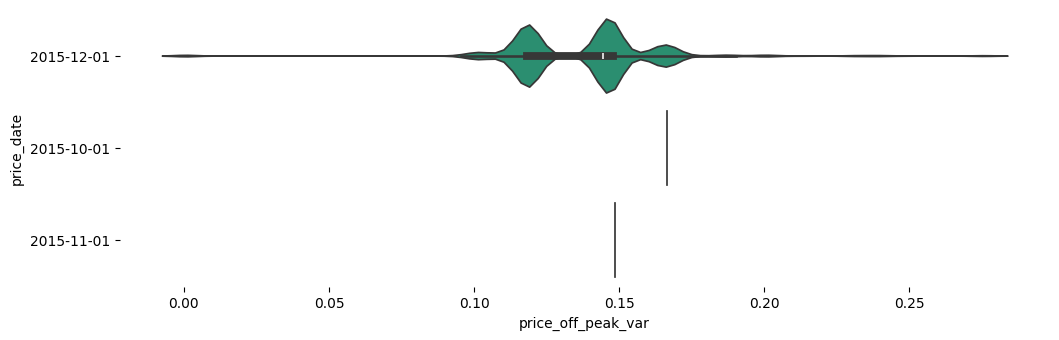

In [23]:
# @title price_date vs price_off_peak_var

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(dec_prices['price_date'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(dec_prices, x='price_off_peak_var', y='price_date', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [22]:
jan_prices

,id,price_date,price_off_peak_var,price_off_peak_fix
0,0002203ffbb812588b632b9e628cc38d,2015-01-01,0.126098,40.565969
1,0004351ebdd665e6ee664792efc4fd13,2015-01-01,0.148047,44.266931
2,0010bcc39e42b3c2131ed2ce55246e3c,2015-01-01,0.150837,44.444710
3,0010ee3855fdea87602a5b7aba8e42de,2015-01-01,0.123086,40.565969
4,00114d74e963e47177db89bc70108537,2015-01-01,0.149434,44.266931
...,...,...,...,...
16091,ffef185810e44254c3a4c6395e6b4d8a,2015-01-01,0.162720,41.063970
16092,fffac626da707b1b5ab11e8431a4d0a2,2015-01-01,0.148825,44.266931
16093,fffc0cacd305dd51f316424bbb08d1bd,2015-01-01,0.153159,41.063970
16094,fffe4f5646aa39c7f97f95ae2679ce64,2015-01-01,0.127566,40.565969


<ipython-input-24-040d3f892bce>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(jan_prices, x='price_off_peak_var', y='price_date', inner='box', palette='Dark2')


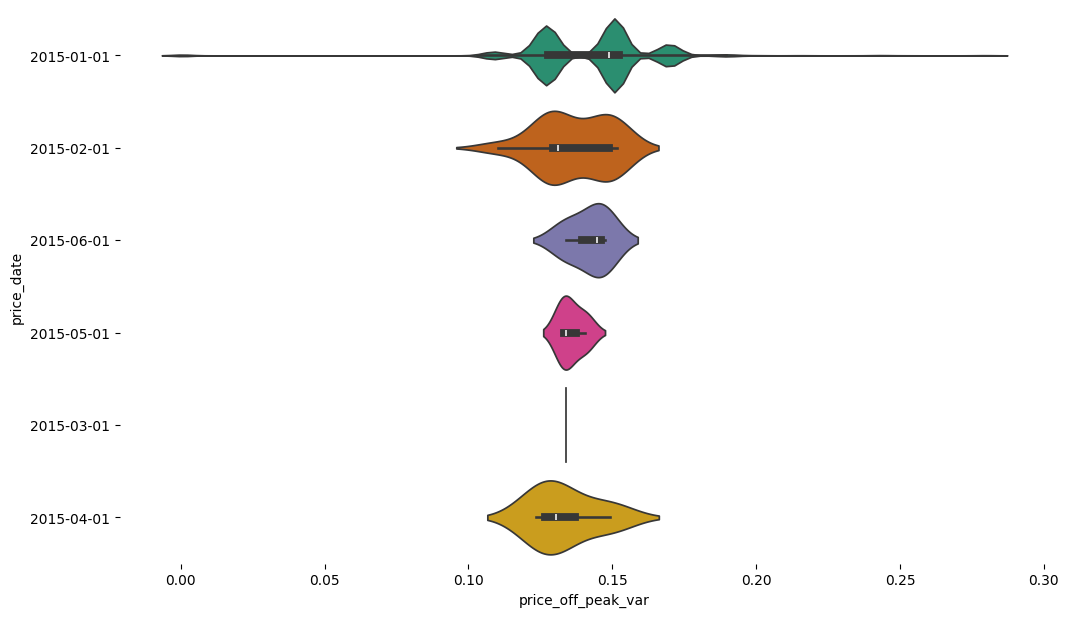

In [24]:
# @title price_date vs price_off_peak_var

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(jan_prices['price_date'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(jan_prices, x='price_off_peak_var', y='price_date', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

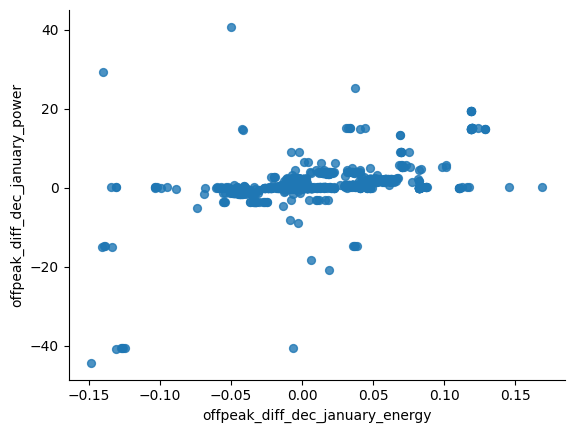

In [25]:
# offpeak_diff_dec_january_energy vs offpeak_diff_dec_january_power

from matplotlib import pyplot as plt
diff.plot(kind='scatter', x='offpeak_diff_dec_january_energy', y='offpeak_diff_dec_january_power', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

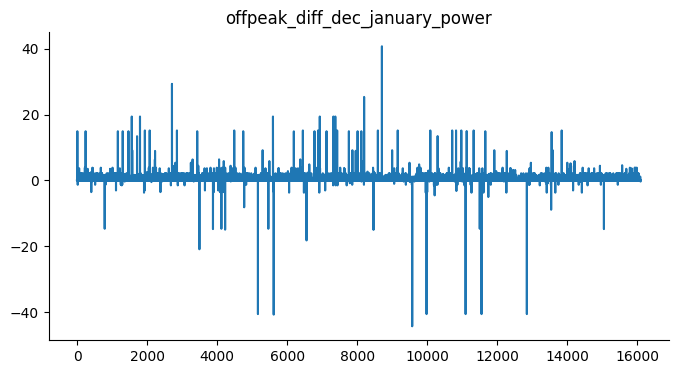

In [26]:
# @title offpeak_diff_dec_january_power

from matplotlib import pyplot as plt
diff['offpeak_diff_dec_january_power'].plot(kind='line', figsize=(8, 4), title='offpeak_diff_dec_january_power')
plt.gca().spines[['top', 'right']].set_visible(False)

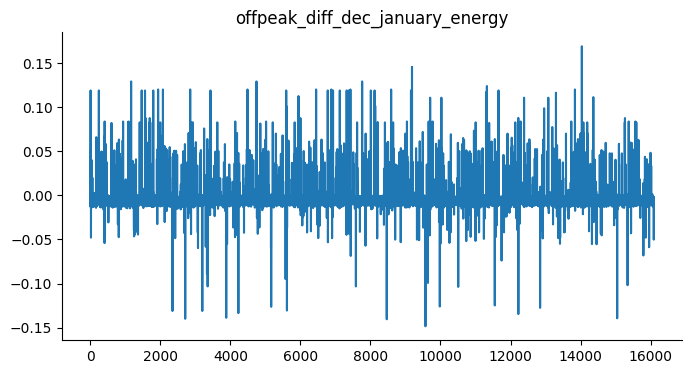

In [27]:
# @title offpeak_diff_dec_january_energy

from matplotlib import pyplot as plt
diff['offpeak_diff_dec_january_energy'].plot(kind='line', figsize=(8, 4), title='offpeak_diff_dec_january_energy')
plt.gca().spines[['top', 'right']].set_visible(False)

## Combine Datasets

In [29]:
# Merge the datasets , Merge the client_data with clean_data based on a common column, likely id.
final_data = pd.merge(client_data, df, on='id', how='left')


In [30]:
final_data

,id,channel_sales_x,cons_12m_x,cons_gas_12m_x,cons_last_month_x,date_activ_x,date_end_x,date_modif_prod_x,date_renewal_x,forecast_cons_12m_x,...,date_renewal_month,date_renewal_day,date_renewal_dayofyear,date_renewal_year,activ_end_diff,modif_renewal_diff,total_consumption_12m,total_forecast_consumption,forecast_accuracy,margin_per_year
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,6,23,174,2015,1096,-131,54946,0.00,0.00,226.330000
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,8,31,243,2015,2566,2201,4660,189.95,-4470.05,3.148333
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,4,17,107,2015,2192,1827,544,47.96,-496.04,1.100000
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,3,31,90,2015,2192,1827,1584,240.04,-1343.96,4.243333
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,3,9,68,2015,2245,1881,4425,971.75,-3979.25,7.996667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14601,18463073fb097fc0ac5d3e040f356987,foosdfpfkusacimwkcsosbicdxkicaua,32270,47940,0,2012-05-24,2016-05-08,2015-05-08,2014-05-26,4648.01,...,5,26,146,2014,1445,-347,80210,4648.01,-27621.99,95.442500
14602,d0a6f71671571ed83b2645d23af6de00,foosdfpfkusacimwkcsosbicdxkicaua,7223,0,181,2012-08-27,2016-08-27,2012-08-27,2015-08-28,631.69,...,8,28,240,2015,1461,1096,7223,812.69,-6591.31,30.113333
14603,10e6828ddd62cbcf687cb74928c4c2d2,foosdfpfkusacimwkcsosbicdxkicaua,1844,0,179,2012-02-08,2016-02-07,2012-02-08,2015-02-09,190.39,...,2,9,40,2015,1460,1097,1844,369.39,-1653.61,5.095000
14604,1cf20fd6206d7678d5bcafd28c53b4db,foosdfpfkusacimwkcsosbicdxkicaua,131,0,0,2012-08-30,2016-08-30,2012-08-30,2015-08-31,19.34,...,8,31,243,2015,1461,1096,131,19.34,-111.66,0.320000


In [31]:
final_data.to_csv('final_data_with_features.csv', index=False)
